In [1]:
import matplotlib.pyplot as plt
import scipy.io as spio 
import pandas as pd
import numpy as np
import os
from my_tools import *

In [43]:
# SAVIOR https://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries
def manual_loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

def improvement_df(mat_path):
    raw_mat = manual_loadmat(mat_path)
    mat = {k : el for k, el in raw_mat.items() if k.startswith('session')}
    improvement_df = pd.concat({k: pd.DataFrame.from_dict(v,orient='index').T for k, v in mat.items()})
    improvement_df.index.names = ['date', 'useless']
    improvement_df = improvement_df.reset_index().drop('useless',axis= 1)
    improvement_df['date'] = improvement_df['date'].apply(lambda x : x.split('session_')[1])
    return improvement_df

## IMPROVEMENT WRT BASELINE

In [44]:
pat1_df = improvement_df('/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/Patient1/Rohrer_Daniela_1979-03-08/Assessments/perc_impro.mat')
pat2_df = improvement_df('/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/Patient2/Wagner_Kerstin_1969-01-28/Assessments/perc_impro.mat')
pat3_df = improvement_df('/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/Patient3/Bamert_Bettina_1956-08-14/Assessments/perc_impro.mat')

In [45]:
baseline_date1 = '10_09_2018'
bs1 = pd.to_datetime(baseline_date1, format="%d_%m_%Y") 

baseline_date2 = '2020-03-02'
bs2 = pd.to_datetime(baseline_date2, format="%Y-%m-%d") 

baseline_date3 = '20_09_2019'
bs3 = pd.to_datetime(baseline_date3, format="%d_%m_%Y") 

In [46]:
measure = 'SHAPS'

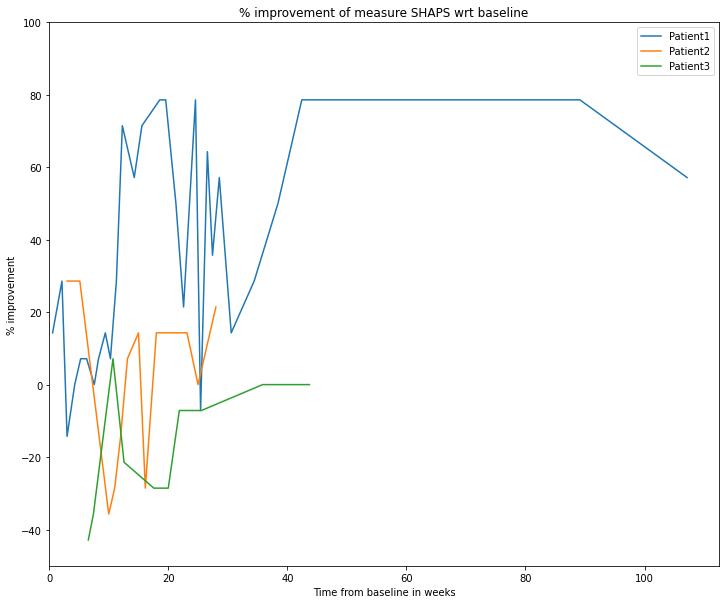

In [47]:
plt.figure(figsize = (12,10))
plt.title('% improvement of measure {} wrt baseline'.format(measure))
plt.plot((pd.to_datetime(pat1_df["date"], format="%d_%m_%Y") - bs1)/np.timedelta64(1,'W'), pat1_df[measure], label = 'Patient1')
plt.plot((pd.to_datetime(pat2_df["date"], format="%d_%m_%Y") - bs2)/np.timedelta64(1,'W'), pat2_df[measure], label = 'Patient2')
plt.plot((pd.to_datetime(pat3_df["date"], format="%d_%m_%Y") - bs3)/np.timedelta64(1,'W'), pat3_df[measure], label = 'Patient3')
plt.ylim([-50, 100])
plt.xlim(left = 0)
plt.ylabel('% improvement')
plt.xlabel('Time from baseline in weeks')
plt.legend()
plt.show()

## RAW MEASURE

#### Patient1

In [48]:
plot_path = '/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/Patient1/VTA_tracts/plot'
assessment_path = '/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/Patient1/Rohrer_Daniela_1979-03-08/Assessments'
baseline_file = 'Rohrer_Daniela_1979-03-08_Depressionassessments_2018-09-10.xlsm'
files_to_remove = 'Rohrer_Daniela_1979-03-08_hochfrequente Assessments_2018-10-1.xlsm'

dates1 = np.load(plot_path + '/sorted_dates.npy')
df1 = read_assessments(dates1,assessment_path, baseline_file, files_to_remove)

10.09.2018 has nan LEFT stimulation
10.09.2018 has nan ROIGHT stimulation
10.09.2018 has nan LEFT stimulation
10.09.2018 has nan ROIGHT stimulation
14.09.2018 has nan LEFT stimulation
14.09.2018 has nan ROIGHT stimulation


#### Patient3

In [49]:
plot_path3 = '/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/Patient3/VTA_tracts/plot'
assessment_path3 = '/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/Patient3/Bamert_Bettina_1956-08-14/Assessments'
baseline_file3 = 'baseline_summary.xlsm'
files_to_remove3 = ''


dates3 = np.load(plot_path3 + '/sorted_dates.npy')
df3 = read_assessments(dates3,assessment_path3, baseline_file3, files_to_remove3)

20.09.2019 has nan LEFT stimulation
20.09.2019 has nan ROIGHT stimulation
20.09.2019 has nan LEFT stimulation
20.09.2019 has nan ROIGHT stimulation


#### Patient2

In [50]:
assessment_path2 = '/media/brainstimmaps/DATA/20xx_Projects/2025_DBSinDepression/03_Data/Patient2/Wagner_Kerstin_1969-01-28/Assessments'
baseline_file2 = 'Wagner_Kerstin_1969-01-28_2020-03-02.xlsm'

baseline_date2 = '2020-03-02'
bs2 = pd.to_datetime(baseline_date2, format="%Y-%m-%d") 

In [51]:
def read_assessmentsPAt2(assessment_path,baseline_file ):
    

    list_of_assessments = ['BDI', 'HAMD', 'MADRS', 'SHAPS', 'Sheehan', 'SOFAS', 'BARS']
    max_val_assessment = dict(zip(list_of_assessments, [63, 65, 60, 14, 30, 100, 14]))  # from the summary file

    baseline_dict = parse_excel_outcome(assessment_path + '/' + baseline_file, max_val_assessment)

    baseline_assessments = {k: baseline_dict[k] for k in list_of_assessments}
    files_to_read = [fil for fil in os.listdir(assessment_path2) if 'DBS' in fil ]

    #files_to_read = [el for el in files_to_read if el not in baseline_file]
    
    # getting sorted dates without going through VTAready for MATLAB

    sorted_dates_anotherformat = sorted([pd.to_datetime(el.split('_')[-1].split('.xlsm')[0], format = '%d.%m.%Y') for el in files_to_read])
    sorted_dates = [el.strftime("%d.%m.%Y") for el in sorted_dates_anotherformat]

    parsed_files = [parse_excel_outcome(assessment_path + '/' + fil, max_val_assessment) for fil in files_to_read]
    
    parsed_dict = {item['date']: item for item in parsed_files if item['date'] in sorted_dates}
    percentages_impro = parsed_dict.copy()
    for date, inner_dict in parsed_dict.items():
        parsed_dict[date] = {k: inner_dict[k] for k in list_of_assessments}
        percentages_impro[date] = {k: round(baseline_assessments[k] - inner_dict[k], 2) if k != 'SOFAS' else round(
            inner_dict[k] - baseline_assessments[k], 2) for k in list_of_assessments}

    percentages_impro = {'session_' + datetime.strptime(date, "%d.%m.%Y").strftime("%d_%m_%Y"): percentages_impro[date]
                         for ind, date in enumerate(sorted_dates)}
    spio.savemat(assessment_path + '/' + 'perc_impro.mat', percentages_impro)
    #
    df = create_assessment_df(parsed_dict, baseline_dict, baseline_assessments)
    #df has n_assessment*n-sessions rows with columns measure,date and values(already in %)
    return df

In [52]:
df2 = read_assessmentsPAt2(assessment_path2,baseline_file2 )

25.05.2020 has nan LEFT stimulation
25.05.2020 has nan ROIGHT stimulation
23.06.2020 has nan LEFT stimulation
23.06.2020 has nan ROIGHT stimulation
date in title 11.05.2020
11.05.2020 has nan LEFT stimulation
11.05.2020 has nan ROIGHT stimulation
15.06.2020 has nan LEFT stimulation
15.06.2020 has nan ROIGHT stimulation
date in title 18.05.2020
18.05.2020 has nan LEFT stimulation
18.05.2020 has nan ROIGHT stimulation
07.04.2020 has nan LEFT stimulation
07.04.2020 has nan ROIGHT stimulation
23.03.2020 has nan LEFT stimulation
23.03.2020 has nan ROIGHT stimulation
date in title 24.08.2020
24.08.2020 has nan LEFT stimulation
24.08.2020 has nan ROIGHT stimulation
11.08.2020 has nan LEFT stimulation
11.08.2020 has nan ROIGHT stimulation
date in title 06.07.2020
06.07.2020 has nan LEFT stimulation
06.07.2020 has nan ROIGHT stimulation
14.09.2020 has nan LEFT stimulation
14.09.2020 has nan ROIGHT stimulation
date in title 02.06.2020
02.06.2020 has nan LEFT stimulation
02.06.2020 has nan ROIGHT

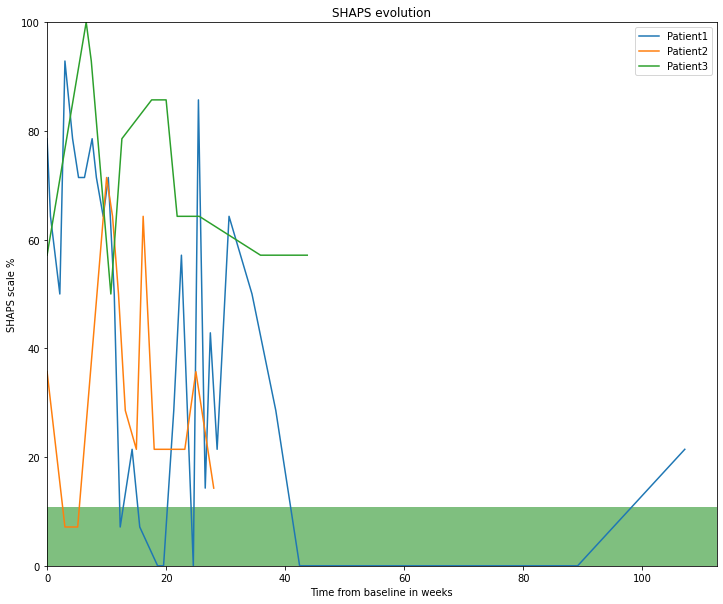

In [53]:
mdf3 = df3[df3.measure == measure]
mdf1 = df1[df1.measure == measure]
mdf2 = df2[df2.measure == measure]

fig, ax = plt.subplots(figsize = (12,10))
ax.set_title('{} evolution'.format(measure))
ax.plot((mdf1['date'] - bs1)/np.timedelta64(1,'W'), mdf1.value, label = 'Patient1')
ax.plot((mdf2['date'] - bs2)/np.timedelta64(1,'W'), mdf2.value, label = 'Patient2')
ax.plot((mdf3['date'] - bs3)/np.timedelta64(1,'W'), mdf3.value, label = 'Patient3')

# cut off HAMD 21 https://pubmed.ncbi.nlm.nih.gov/20447651/ at 7
# in percentage is 
cut_off_hamilton = 7*100 / 65
ax.axhspan(0, cut_off_hamilton, facecolor='green', alpha=0.5)
ax.set_ylim([0,100])
ax.set_xlim(left = 0)
ax.set_ylabel('{} scale %'.format(measure))
ax.set_xlabel('Time from baseline in weeks')
plt.legend()
plt.show()